In [3]:
import os, sys
import io
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski

import sys
sys.path.append('..')

# local library of functions to connect to image server
import calcimetry.use_server as server

# A notebook to look at an image

In [4]:
img_path = server.init()  # initiate the global (privatevariables for the database

server : http://imgserver.10.68.0.250.nip.io/data/andra


Status Code 200
nombre de fichiers disponibles 2268
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0065_0161.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0210_0305.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_2020_2107.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0530_0626.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1495_1590.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0448_0546.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_2191_2287.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0620_0715.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1230_1329.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1316_1416.jpg
Status Code 200
image /data/andra/calci_photos/TER1302/Photos/GTR2005-10_0047_TER1302_0950_1049.jpg(1980) de taille (2048, 516)


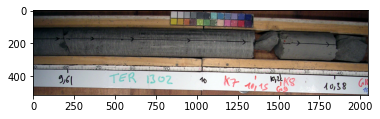

In [5]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
for i in range(10):
    print(files[i])

idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

Convert image to numpy array to have a look at it

In [6]:
image = np.array(img)

Plot the red, green, and blue channels to see if the core is easily recognised

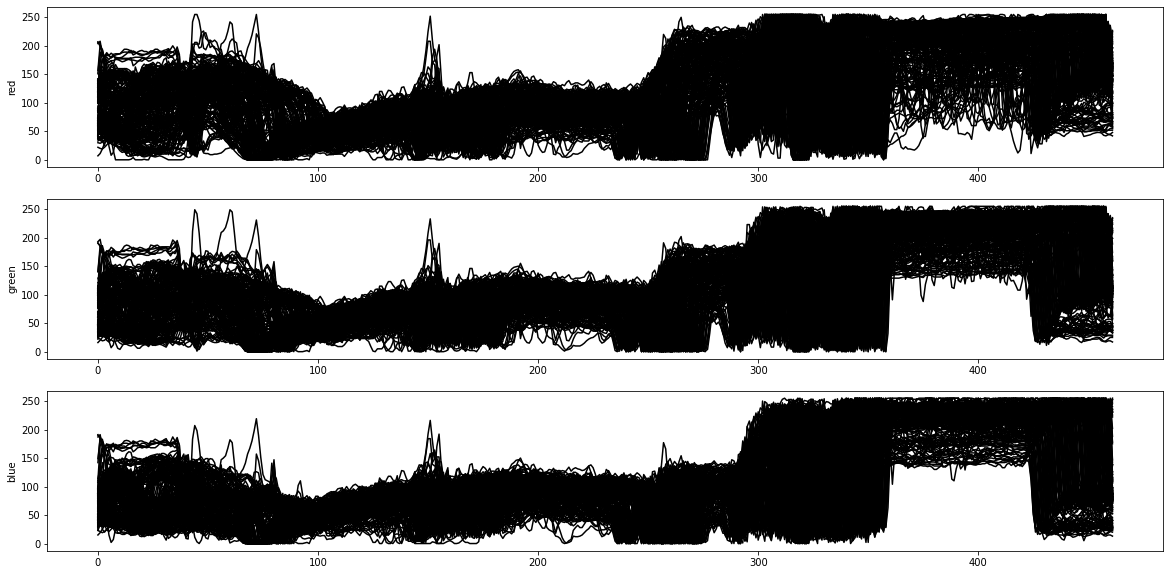

In [5]:
colors = ('red', 'green', 'blue')
channel_ids = [0, 1, 2]

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

Status Code 200
image /data/andra/Photos/FUG2020-06_0009-OHZ6322_1501_1613.jpg(2084) de taille (5183, 974)


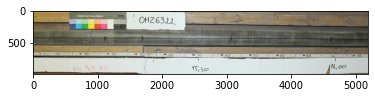

In [6]:
idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

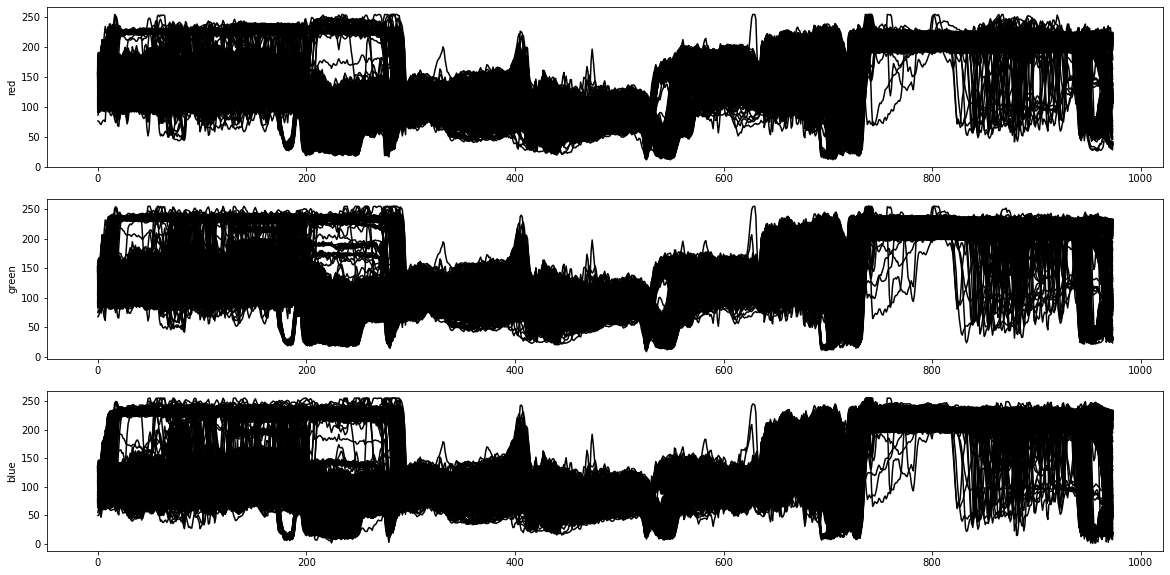

In [7]:
image = np.array(img)

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

## Get a list of the directories of photos

In [7]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
dirnames = []
for i in range(len(files)):
    dirnames.append(files[i].split('/')[4])
                                 
listdir = set(dirnames)
print(listdir)
                                
    

Status Code 200
nombre de fichiers disponibles 2268
{'FUG2020-06_0009-OHZ7120_2900_3022.jpg', 'FUG2020-06_0009-OHZ7120_0074_0196.jpg', 'FUG2020-06_0009-OHZ7120_0687_0810.jpg', 'FUG2020-06_0009-OHZ7120_3404_3525.jpg', 'KEY1004', 'KEY1006', 'GTR2010-01_0002_OHZ1302_2420_2505.jpg', 'GTR2010-01_0002_OHZ1302_0350_0450.jpg', 'GTR2010-01_0002_OHZ1304_0000_0105.jpg', 'OHZ3004', 'DIR1001', 'OHZ6128', 'GTR2010-01_0002_OHZ1304_0870_0995.jpg', 'FUG2020-06_0009-OHZ7120_0774_0864.jpg', 'FUG2020-06_0009-OHZ7120_3547_3637.jpg', 'FUG2020-06_0009-OHZ6322_1236_1340.jpg', 'FUG2020-06_0009-OHZ6322_1737_1856.jpg', 'GTR2010-01_0002_OHZ1302_2970_3080.jpg', 'SUG1104', 'FUG2020-07_0009-OHZ7000_0966_1087.jpg', 'FUG2020-07_0009-OHZ7000_2746_2840.jpg', 'SUG2101', 'FUG2020-06_0009-OHZ7120_2471_2592.jpg', 'SUG1106', 'FUG2020-06_0009-OHZ7120_2562_2684.jpg', 'DPC3022', 'FUG2020-06_0009-OHZ6320_1489_1609.jpg', 'GTR2010-01_0002_OHZ1302_2823_2910.jpg', 'GTR2010-01_0002_OHZ1302_0868_0990.jpg', 'SUG1301', 'FUG2020-07_0009-

In [9]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
dirnames = []
for i in range(len(files)):
    dirnames.append(files[i].split('/')[3])
                                 
listdir = set(dirnames)
print(listdir)

Status Code 200
nombre de fichiers disponibles 2268
{'Photos OHZ1302', 'calci_photos', 'Photos OHZ1304', 'Photos'}


## Lire une image avec la base de données Mongo

Status Code 200


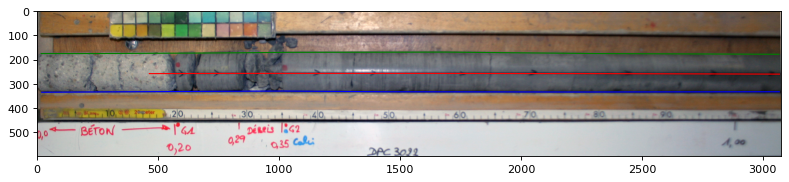

In [22]:
from calcimetry.mongo_api import MongoInfo, MongoAPI
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.pyplot import figure

mongo_info = MongoInfo()

def draw_line(polyline, color='red'):
    x = []
    y = []
    for t in polyline:
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


drill_name = 'DPC3022'
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'DrillName': drill_name })

    top_line = draw_line(doc['k_Up'], color='green')
    arrow_line = draw_line(doc['k_Arrow'], color='red')
    bottom_line = draw_line(doc['k_Down'], color='blue')

    filename = f"/data/andra/calci_photos/{drill_name}/Photos/{doc['FileName']}"
    img = server.get_file(filename)

    figure(figsize=(12, 8), dpi=80)
    plt.imshow(img)
    plt.gca().add_patch(top_line)
    plt.gca().add_patch(arrow_line)
    plt.gca().add_patch(bottom_line)


        
